# Load data

In [1]:
import json

In [2]:
with open("data_20180628145058.json" , encoding="utf8") as f:
            be_id_map = json.load(f)

# read keys

In [3]:
be_id_map.keys()

dict_keys(['@graph', 'iri', '@context'])

In [4]:
be_id_map['@context']

'context.json'

In [5]:
be_id_map['iri']

'gbr:'

# check brs

In [6]:
import pandas as pd

In [7]:
br_list=pd.DataFrame(be_id_map['@graph'])

In [8]:
len(br_list)

1050978

# type (a)

In [9]:

flat_list = [item for sublist in br_list.a for item in sublist]

In [10]:
set(flat_list)

{'article', 'book', 'collection', 'document', 'inbook', 'review'}

In [11]:
br_list=br_list[['citation', 'contributor', 'date', 'identifier', 'iri', 'label',
       'reference', 'title']]

# Check title

In [12]:
len(br_list[~br_list.title.isnull()])

157212

In [13]:
br_list=br_list[['citation', 'contributor', 'date', 'identifier', 'iri', 'label',
       'reference']]

# check date

In [14]:
datedf=pd.DataFrame(list(br_list[~br_list["date"].isnull()]["date"]))

In [15]:
len(datedf)

157146

In [16]:
set(datedf.a)

{'year'}

In [17]:
#set(datedf.value)

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

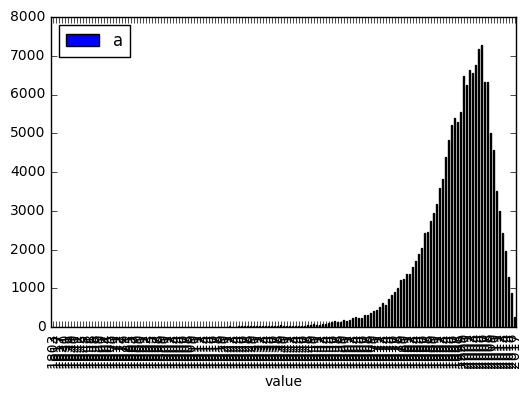

In [20]:
datedf.groupby("value").count().plot(kind='bar')

# citation check

In [21]:
br_list=br_list[['citation', 'contributor', 'identifier', 'iri', 'label',
       'reference']]

In [22]:
len(br_list[~br_list.citation.isnull()])==len(br_list[~br_list.reference.isnull()])

True

In [23]:
br_list[~br_list.citation.isnull()].head(1)

,citation,contributor,identifier,iri,label,reference
926,"[gbr:0110512, gbr:0110513, gbr:0110514, gbr:01...","[{'role_of': {'name': 'Ed. Sigma', 'label': 'r...","[{'type': 'url', 'id': 'http://www.ssoar.info/...",gbr:0110927,bibliographic resource 0110927 [br/0110927],"[{'content': 'Adamy, W . (1998): Arbeitslosigk..."


In [24]:
def excross(lk):
    tp=[]
    for item in lk:
        tp.append(item["crossref"])
    return tp

In [25]:
br_list["citationtemp"]=br_list[~br_list.citation.isnull()].reference.apply(excross)

In [26]:
br_list["difcit"]=br_list[~br_list.citation.isnull()]["citation"].apply(set)-br_list[~br_list.citation.isnull()]["citationtemp"].apply(set)

In [27]:
br_list["difcit"]=br_list[~br_list.citation.isnull()]["difcit"].apply(len)

In [28]:
br_list[~br_list.citation.isnull()][br_list.difcit>0]["difcit"]

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Series([], Name: difcit, dtype: float64)

In [29]:
br_list["difcit"]=br_list[~br_list.citation.isnull()]["citationtemp"].apply(set)-br_list[~br_list.citation.isnull()]["citation"].apply(set)

In [30]:
br_list["difcit"]=br_list[~br_list.citation.isnull()]["difcit"].apply(len)

In [31]:
br_list[~br_list.citation.isnull()][br_list.difcit>0]["difcit"]

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Series([], Name: difcit, dtype: float64)

In [32]:
br_list=br_list[['contributor', 'identifier', 'iri', 'label',
       'reference']]

# contributor

In [33]:
con_list=[]
for item in list(br_list[~br_list.contributor.isnull()]["contributor"]):
    for item1 in item:
        con_list.append(item1)

In [34]:
cont=pd.DataFrame(con_list)

In [35]:
set(cont.a)

{'role'}

In [36]:
set(cont.role_type)

{'author', 'publisher'}

In [37]:
cont=cont[["iri","label","role_of"]]

In [38]:
cont.iri=cont.iri.apply(lambda x: x.replace("gar:","").replace(" ",""))

In [39]:
cont.label=cont.label.apply(lambda x: x.replace("agent role ","").replace("[ar/","").replace("]","").split(" ")).apply(set)

In [40]:
cont["lenlabel"]=cont.label.apply(len)

In [41]:
cont[cont.lenlabel>1]

,iri,label,role_of,lenlabel


In [42]:
cont=cont[["iri","label","role_of"]]

In [43]:
cont.label=cont.label.apply(lambda x:list(x)[0])

In [181]:
cont[cont["iri"]!=cont["label"]]

,iri,label,role_of


In [45]:
len(cont)

287009

In [47]:
len(set(cont.iri))

287009

# role of

In [48]:
roleofdf=pd.DataFrame(list(cont.role_of))

In [49]:
set(roleofdf.a)

{'agent'}

In [50]:
roleofdf=roleofdf[["iri","label"]]

In [51]:
roleofdf.iri=roleofdf.iri.apply(lambda x:x.replace("gra:","").replace(" ",""))

In [52]:
roleofdf.label=roleofdf.label.apply(lambda x: x.replace("responsible agent ","").replace("[ra/","").replace("]","").split(" ")).apply(set)

In [53]:
roleofdf["lenlable"]=roleofdf.label.apply(len)

In [54]:
roleofdf[roleofdf.lenlable>1]

,iri,label,lenlable


In [55]:
roleofdf["label"]=roleofdf.label.apply(lambda x:list(x)[0])

In [56]:
roleofdf=roleofdf[["iri","label"]]

In [57]:
roleofdf[roleofdf["iri"]!=roleofdf["label"]]

,iri,label


In [58]:
len(roleofdf)

287009

In [59]:
len(set(roleofdf.iri))

287009

# identifier

In [219]:
br_list=br_list[['identifier', 'iri', 'label',
       'reference']]

In [74]:
lsr=[]
for item in list(br_list[~br_list.identifier.isnull()].identifier):
    for item1 in item:
        lsr.append(item1)

In [75]:
iddf=pd.DataFrame(lsr)

In [76]:
set(iddf.a)

{'unique_identifier'}

In [77]:
set(iddf["type"])

{'doi', 'isbn', 'url', 'urn'}

In [78]:
iddf[]

,a,id,iri,label,type
0,unique_identifier,http://www.ssoar.info/ssoar/handle/document/25090,gid:01101,identifier 01101 [id/01101],url
1,unique_identifier,10.4232/10.CPoS-2010-03de,gid:01102,identifier 01102 [id/01102],doi
2,unique_identifier,urn:nbn:de:bib-cpos-2010-03de8,gid:01103,identifier 01103 [id/01103],urn
3,unique_identifier,http://www.ssoar.info/ssoar/handle/document/51278,gid:01104,identifier 01104 [id/01104],url
4,unique_identifier,978-9972-615-33-2,gid:01105,identifier 01105 [id/01105],isbn
5,unique_identifier,urn:nbn:de:0168-ssoar-51278-9,gid:01106,identifier 01106 [id/01106],urn
6,unique_identifier,http://www.ssoar.info/ssoar/handle/document/1245,gid:01107,identifier 01107 [id/01107],url
7,unique_identifier,3-456-82325-8,gid:01108,identifier 01108 [id/01108],isbn
8,unique_identifier,urn:nbn:de:0168-ssoar-12452,gid:01109,identifier 01109 [id/01109],urn
9,unique_identifier,http://www.ssoar.info/ssoar/handle/document/5142,gid:011010,identifier 011010 [id/011010],url


In [72]:
iddf=iddf[["id","iri","label"]]

In [80]:
iddf=iddf[["iri","label"]]

In [82]:
iddf.iri=iddf.iri.apply(lambda x:x.replace("gid:","").replace(" ",""))

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [88]:
iddf.label=iddf.label.apply(lambda x:x.replace("identifier ","").replace("[id/","").replace("]","").split(" ")).apply(set)

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [90]:
iddf["lenlab"]=iddf.label.apply(len)

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
iddf[iddf.lenlab>1]

,iri,label,lenlab


In [94]:
iddf=iddf[["iri","label"]]

In [97]:
iddf.label=iddf.label.apply(lambda x:list(x)[0])

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [99]:
iddf[iddf.iri!=iddf.label]

,iri,label


In [113]:
len(iddf)

119611

In [114]:
len(set(iddf.iri))

119611

# reference

In [148]:
br_list=br_list[['iri', 'label',
       'reference']]

In [149]:
ref_def=br_list[~br_list.reference.isnull()]

In [150]:
lrdf=[]
for item in list(ref_def.reference):
    for item1 in item:
        lrdf.append(item1)
        

In [151]:
lrdf=pd.DataFrame(lrdf)

In [152]:
set(lrdf.a)

{'entry'}

In [153]:
len(lrdf)

1148424

In [154]:
lrdf=lrdf[["crossref","iri","label"]]

In [155]:
set(lrdf.crossref)-set(br_list.iri)

set()

In [156]:
lrdf=lrdf[["iri","label"]]

In [157]:
lrdf.iri=lrdf.iri.apply(lambda x:x.replace("gbe:",""))

In [158]:
lrdf.label=lrdf.label.apply(lambda x:x.replace("bibliographic entry ","").replace("[be/","").replace("]","").split(" ")).apply(set)

In [159]:
lrdf["lenlabel"]=lrdf.label.apply(len)

In [160]:
lrdf[lrdf.lenlabel>1]

,iri,label,lenlabel


In [161]:
lrdf.label=lrdf.label.apply(lambda x:list(x)[0])

In [164]:
lrdf[lrdf.iri!=lrdf.label]

,iri,label,lenlabel


# iri , label

In [165]:
br_list=br_list[['iri', 'label']]

In [167]:
br_list.iri=br_list.iri.apply(lambda x:x.replace("gbr:",""))

In [169]:
br_list.label=br_list.label.apply(lambda x:x.replace("bibliographic resource ","").replace("[br/","").replace("]","").split(" "))

In [171]:
br_list.label=br_list.label.apply(lambda x:set(x))

In [173]:
br_list["lenlabel"]=br_list.label.apply(len)

In [175]:
br_list[br_list.lenlabel>1]

,iri,label,lenlabel


In [178]:
br_list=br_list[["iri","label"]]

In [181]:
br_list.label=br_list.label.apply(lambda x: list(x)[0])

C:\Program Files\Anaconda2\envs\python3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [183]:
br_list[br_list.iri!=br_list.label]

,iri,label


In [184]:
len(br_list)

1050978

In [185]:
len(set(br_list.iri))

1050978